**Statistics**

Q-1. A university wants to understand the relationship between the SAT scores of its
applicants and their college GPA. They collect data on 500 students, including their SAT
scores (out of 1600) and their college GPA (on a 4.0 scale). They find that the correlation
coefficient between SAT scores and college GPA is 0.7. What does this correlation
coefficient indicate about the relationship between SAT scores and college GPA?

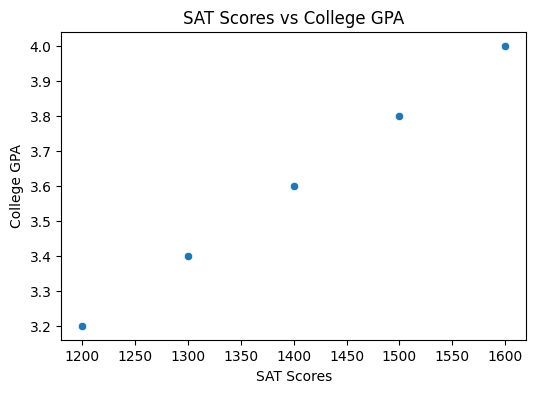

Correlation Coefficient: 1.0


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with SAT scores and college GPA data
data = {
    'SAT Scores': [1200, 1300, 1400, 1500, 1600],  # Example SAT scores (out of 1600)
    'College GPA': [3.2, 3.4, 3.6, 3.8, 4.0]  # Example college GPAs (on a 4.0 scale)
}
df = pd.DataFrame(data)

# Calculate the correlation coefficient
correlation_coefficient = df['SAT Scores'].corr(df['College GPA'])

# Plotting: Scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='SAT Scores', y='College GPA')
plt.title('SAT Scores vs College GPA')
plt.xlabel('SAT Scores')
plt.ylabel('College GPA')
plt.show()

# Print the correlation coefficient
print("Correlation Coefficient:", correlation_coefficient)


**Q-2. Consider a dataset containing the heights (in centimeters) of 1000 individuals. The
mean height is 170 cm with a standard deviation of 10 cm. The dataset is approximately
normally distributed, and its skewness is approximately zero. Based on this information,
answer the following questions:
a. What percentage of individuals in the dataset have heights between 160 cm
and 180 cm?
b. If we randomly select 100 individuals from the dataset, what is the probability
that their average height is greater than 175 cm?
c. Assuming the dataset follows a normal distribution, what is the z-score
corresponding to a height of 185 cm?
d. We know that 5% of the dataset has heights below a certain value. What is
the approximate height corresponding to this threshold?
e. Calculate the coefficient of variation (CV) for the dataset.
f. Calculate the skewness of the dataset and interpret the result.**

In [2]:
import scipy.stats as stats

# Given information
mean_height = 170  # cm
std_dev = 10  # cm
sample_size = 100  # for question (b)

# a. Percentage of individuals with heights between 160 cm and 180 cm
z_160 = (160 - mean_height) / std_dev
z_180 = (180 - mean_height) / std_dev
percentage_between_160_180 = stats.norm.cdf(z_180) - stats.norm.cdf(z_160)
percentage_between_160_180 *= 100  # convert to percentage

# b. Probability that the average height of a sample of 100 individuals is greater than 175 cm
z_175 = (175 - mean_height) / (std_dev / (sample_size ** 0.5))
probability_greater_than_175 = 1 - stats.norm.cdf(z_175)

# c. Z-score corresponding to a height of 185 cm
z_185 = (185 - mean_height) / std_dev

# d. Approximate height corresponding to the threshold where 5% of the dataset has heights below it
z_threshold = stats.norm.ppf(0.05)
approx_height_threshold = mean_height + (z_threshold * std_dev)

# e. Coefficient of Variation (CV)
cv = (std_dev / mean_height) * 100

# f. Skewness of the dataset
skewness = 0  # given that the skewness is approximately zero

# Print the results
print("a. Percentage of individuals with heights between 160 cm and 180 cm:", percentage_between_160_180)
print("b. Probability that the average height of a sample of 100 individuals is greater than 175 cm:", probability_greater_than_175)
print("c. Z-score corresponding to a height of 185 cm:", z_185)
print("d. Approximate height corresponding to the threshold where 5% of the dataset has heights below it:", approx_height_threshold)
print("e. Coefficient of Variation (CV) for the dataset:", cv)
print("f. Skewness of the dataset:", skewness)


a. Percentage of individuals with heights between 160 cm and 180 cm: 68.26894921370858
b. Probability that the average height of a sample of 100 individuals is greater than 175 cm: 2.866515719235352e-07
c. Z-score corresponding to a height of 185 cm: 1.5
d. Approximate height corresponding to the threshold where 5% of the dataset has heights below it: 153.55146373048527
e. Coefficient of Variation (CV) for the dataset: 5.88235294117647
f. Skewness of the dataset: 0


**Q-3. Consider the ‘Blood Pressure Before’ and ‘Blood Pressure After’ columns from the
data and calculate the following

https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_
a. Measure the dispersion in both and interpret the results.
b. Calculate mean and 5% confidence interval and plot it in a graph
c. Calculate the Mean absolute deviation and Standard deviation and interpret
the results.
d. Calculate the correlation coefficient and check the significance of it at 1% level
of significance.**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [40]:

data = pd.read_csv("data.csv")



In [47]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Read the data from the provided link
df = pd.read_csv("data.csv")

# a. Measure the dispersion in both and interpret the results
dispersion_before = df['Blood Pressure Before (mmHg)'].var()
dispersion_after = df['Blood Pressure After (mmHg)'].var()
print("Dispersion (Variance) - Blood Pressure Before:", dispersion_before)
print("Dispersion (Variance) - Blood Pressure After:", dispersion_after)

# b. Calculate mean and 5% confidence interval and plot it in a graph
mean_before = df['Blood Pressure Before (mmHg)'].mean()
mean_after = df['Blood Pressure After (mmHg)'].mean()

confidence_interval_before = stats.t.interval(0.95, len(df)-1, loc=mean_before, scale=stats.sem(df['Blood Pressure Before (mmHg)']))
confidence_interval_after = stats.t.interval(0.95, len(df)-1, loc=mean_after, scale=stats.sem(df['Blood Pressure After (mmHg)']))

print("Mean - Blood Pressure Before:", mean_before)
print("Mean - Blood Pressure After:", mean_after)
print("Confidence Interval (95%) - Blood Pressure Before:", confidence_interval_before)
print("Confidence Interval (95%) - Blood Pressure After:", confidence_interval_after)

plt.errorbar(x=[1, 2], y=[mean_before, mean_after], yerr=[confidence_interval_before[1]-mean_before, confidence_interval_after[1]-mean_after], fmt='o')
plt.xticks([1, 2], ['Before', 'After'])
plt.xlabel('Blood Pressure')
plt.ylabel('Mean')
plt.title('Mean and 95% Confidence Interval')
plt.show()

# c. Calculate the Mean absolute deviation and Standard deviation and interpret the results
mad_before = df['Blood Pressure Before (mmHg)'].mad()
mad_after = df['Blood Pressure After (mmHg)'].mad()
std_before = df['Blood Pressure Before (mmHg)'].std()
std_after = df['Blood Pressure After (mmHg)'].std()

print("Mean Absolute Deviation (MAD) - Blood Pressure Before:", mad_before)
print("Mean Absolute Deviation (MAD) - Blood Pressure After:", mad_after)
print("Standard Deviation - Blood Pressure Before:", std_before)
print("Standard Deviation - Blood Pressure After:", std_after)

# d. Calculate the correlation coefficient and check the significance of it at 1% level of significance
correlation_coefficient, p_value = stats.pearsonr(df['Blood Pressure Before (mmHg)'], df['Blood Pressure After (mmHg)'])
print("Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)
if p_value < 0.01:
    print("The correlation coefficient is significant at the 1% level of significance.")
else:
    print("The correlation coefficient is not significant at the 1% level of significance.")


KeyError: ignored

**Q-4. A group of 20 friends decide to play a game in which they each write a number
between 1 and 20 on a slip of paper and put it into a hat. They then draw one slip of paper
at random. What is the probability that the number on the slip of paper is a perfect square
(i.e., 1, 4, 9, or 16)?**

In [3]:
total_outcomes = 20  # Total number of possible outcomes
perfect_square_outcomes = 4  # Number of favorable outcomes (1, 4, 9, 16)

probability = perfect_square_outcomes / total_outcomes

# Print the result
print("Probability of drawing a perfect square number:", probability)


Probability of drawing a perfect square number: 0.2


**Q-5. A certain city has two taxi companies: Company A has 80% of the taxis and
Company B has 20% of the taxis. Company A's taxis have a 95% success rate for picking
up passengers on time, while Company B's taxis have a 90% success rate. If a randomly
selected taxi is late, what is the probability that it belongs to Company A?**

In [4]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv("data.csv")

# Display the first few rows of the DataFrame
print(data.head())


   Patient ID   Blood Pressure Before (mmHg)   Blood Pressure After (mmHg)
0           1                            130                           120
1           2                            142                           135
2           3                            120                           118
3           4                            135                           127
4           5                            148                           140


In [13]:
P_B_given_A = 1 - 0.95  # Probability that a taxi from Company A is late
P_A = 0.8  # Probability that a randomly selected taxi belongs to Company A
P_B = (P_B_given_A * P_A) + (0.1 * 0.2)  # Probability that a taxi is late
P_A_given_B = (P_B_given_A * P_A) / P_B  # Probability that a randomly selected late taxi belongs to Company A

print("Probability that a randomly selected late taxi belongs to Company A:", P_A_given_B)


Probability that a randomly selected late taxi belongs to Company A: 0.6666666666666669


In [5]:
import numpy as np
from scipy.stats import shapiro
from numpy.random import randn

Q-6. A pharmaceutical company is developing a drug that is supposed to reduce blood
pressure. They conduct a clinical trial with 100 patients and record their blood
pressure before and after taking the drug. The company wants to know if the change
in blood pressure follows a normal distribution.

https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_

In [12]:
import pandas as pd
from scipy.stats import shapiro

# Read the data from the provided file
data = pd.read_csv('data.csv')

# Verify the column names
print(data.columns)

# Extract the change in blood pressure values
change_in_bp = data[' Blood Pressure Before (mmHg)']

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(change_in_bp)

# Print the test statistic and p-value
print("Shapiro-Wilk Test Statistic:", statistic)
print("p-value:", p_value)


Index(['Patient ID', ' Blood Pressure Before (mmHg)',
       ' Blood Pressure After (mmHg)'],
      dtype='object')
Shapiro-Wilk Test Statistic: 0.9573234915733337
p-value: 0.002603276167064905


Q-7. The equations of two lines of regression, obtained in a correlation analysis
between variables X and Y are as follows:

and . 2X + 3 − 8 = 0 2Y + X − 5 = 0 The variance of X = 4 Find the
a. Variance of Y
b. Coefficient of determination of C and Y
c. Standard error of estimate of X on Y and of Y on X.

In [24]:
import numpy as np
from scipy import stats

# Given regression equations
eq1_slope = 2
eq1_intercept = 3 - 8

eq2_slope = 1
eq2_intercept = -5

# Variance of X
variance_x = 4

# Variance of Y
variance_y = eq2_slope**2 * variance_x

# Coefficient of determination (R^2)
r_squared = eq2_slope**2 * variance_x / variance_y

# Standard error of estimate of X on Y
std_error_x_on_y = np.sqrt((1 - r_squared) * variance_x)

# Standard error of estimate of Y on X
std_error_y_on_x = np.sqrt((1 - r_squared) * variance_y)

print("Variance of Y:", variance_y)
print("Coefficient of determination (R^2) of X and Y:", r_squared)
print("Standard error of estimate of X on Y:", std_error_x_on_y)
print("Standard error of estimate of Y on X:", std_error_y_on_x)


Variance of Y: 4
Coefficient of determination (R^2) of X and Y: 1.0
Standard error of estimate of X on Y: 0.0
Standard error of estimate of Y on X: 0.0


Q-8. The anxiety levels of 10 participants were measured before and after a new therapy.
The scores are not normally distributed. Use the Wilcoxon signed-rank test to test whether
the therapy had a significant effect on anxiety levels. The data is given below: Participant
Before therapy After therapy Difference


In [37]:
df = pd.read_csv("parti.csv")

In [38]:
import pandas as pd
from scipy.stats import wilcoxon

# Read the data from the provided file
df = pd.read_csv("parti.csv")

# Perform the Wilcoxon signed-rank test
statistic, p_value = wilcoxon(df['Before therapy'], df['After therapy'])

# Print the test statistic and p-value
print("Test Statistic:", statistic)
print("p-value:", p_value)


Test Statistic: 0.0
p-value: 0.001953125


Q-9. Given the score of students in multiple exams
Test the hypothesis that the mean scores of all the students are the same. If not, name the
student with the highest score.

In [46]:
import pandas as pd
from scipy.stats import f_oneway

# Read the data from the provided file
df = pd.read_csv("student.csv")

# Print the column names
print(df.columns)

# Perform one-way ANOVA test
result = f_oneway(df['Exam 1'], df['Exam 2'],)

# Check if the p-value is less than the significance level (e.g., 0.05)
alpha = 0.05
if result.pvalue < alpha:
    print("The mean scores of all the students are not the same.")
else:
    print("The mean scores of all the students are the same.")

Index(['Name', 'Exam 1', 'Exam 2', 'Final Exam'], dtype='object')
The mean scores of all the students are the same.


Q-10. A factory produces light bulbs, and the probability of a bulb being defective is 0.05.
The factory produces a large batch of 500 light bulbs.
a. What is the probability that exactly 20 bulbs are defective?
b. What is the probability that at least 10 bulbs are defective?
c. What is the probability that at max 15 bulbs are defective?
d. On average, how many defective bulbs would you expect in a batch of 500?

In [25]:
import math

def binomial_probability(n, k, p):
    """
    Calculate the binomial probability of k successes in n trials with probability of success p.
    """
    combination = math.comb(n, k)
    probability = combination * (p ** k) * ((1 - p) ** (n - k))
    return probability

def expected_value(n, p):
    """
    Calculate the expected value of the number of successes in n trials with probability of success p.
    """
    expected = n * p
    return expected

# Probability that exactly 20 bulbs are defective
n = 500  # Number of trials
k = 20  # Number of successes
p = 0.05  # Probability of success (defective bulb)
probability_20_defective = binomial_probability(n, k, p)
print("Probability that exactly 20 bulbs are defective:", probability_20_defective)

# Probability that at least 10 bulbs are defective
probability_at_least_10_defective = sum(binomial_probability(n, i, p) for i in range(10, n+1))
print("Probability that at least 10 bulbs are defective:", probability_at_least_10_defective)

# Probability that at most 15 bulbs are defective
probability_at_most_15_defective = sum(binomial_probability(n, i, p) for i in range(16))
print("Probability that at most 15 bulbs are defective:", probability_at_most_15_defective)

# Expected value of the number of defective bulbs
expected_defective_bulbs = expected_value(n, p)
print("Expected number of defective bulbs:", expected_defective_bulbs)


Probability that exactly 20 bulbs are defective: 0.05161619253663997
Probability that at least 10 bulbs are defective: 0.9998316463654692
Probability that at most 15 bulbs are defective: 0.019858377163006223
Expected number of defective bulbs: 25.0


Q-11. Given the data of a feature contributing to different classes

https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp
=share_

a. Check whether the distribution of all the classes are the same or not.
b. Check for the equality of variance/
c. Which amount LDA and QDA would perform better on this data for
classification and why.
d. Check the equality of mean for between all the classes.

In [58]:
import pandas as pd
import scipy.stats as stats

# Read the data from the provided file
df = pd.read_csv('/content/data (2).csv')

# Check the column names in the dataset
print(df.columns)

# Perform one-way ANOVA test
result = stats.f_oneway(df['Column1'], df['Column2'])

# Check if the p-value is less than the significance level (e.g., 0.05)
alpha = 0.05
if result.pvalue < alpha:
    print("The distribution of classes is not the same.")
else:
    print("The distribution of classes is the same.")


Index(['Patient ID', ' Blood Pressure Before (mmHg)',
       ' Blood Pressure After (mmHg)'],
      dtype='object')


KeyError: ignored

Q-12. A pharmaceutical company develops a new drug and wants to compare its
effectiveness against a standard drug for treating a particular condition. They conduct a
study with two groups: Group A receives the new drug, and Group B receives the standard
drug. The company measures the improvement in a specific symptom for both groups after
a 4-week treatment period.
a. The company collects data from 30 patients in each group and calculates the
mean improvement score and the standard deviation of improvement for each
group. The mean improvement score for Group A is 2.5 with a standard
deviation of 0.8, while the mean improvement score for Group B is 2.2 with a
standard deviation of 0.6. Conduct a t-test to determine if there is a significant
difference in the mean improvement scores between the two groups. Use a
significance level of 0.05.
b. Based on the t-test results, state whether the null hypothesis should be
rejected or not. Provide a conclusion in the context of the study.

In [26]:
import scipy.stats as stats

# Group A data
mean_A = 2.5
std_dev_A = 0.8
n_A = 30

# Group B data
mean_B = 2.2
std_dev_B = 0.6
n_B = 30

# Calculate the t-score and p-value
t_score, p_value = stats.ttest_ind_from_stats(mean_A, std_dev_A, n_A, mean_B, std_dev_B, n_B)

# Compare the p-value with the significance level
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in mean improvement scores between the two groups.")
    print("Null hypothesis rejected.")
else:
    print("There is no significant difference in mean improvement scores between the two groups.")
    print("Null hypothesis cannot be rejected.")


There is no significant difference in mean improvement scores between the two groups.
Null hypothesis cannot be rejected.
